<a href="https://colab.research.google.com/github/Pratyay-Bera/AI_ML-Projects.py/blob/main/CustomerChurnPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Churn-Data.csv")
df.sample(5)

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
4639,8311-UEUAB,Female,0,Yes,Yes,67,Yes,Yes,DSL,Yes,...,No,No,Yes,Yes,Two year,Yes,Electronic check,75.50,5229.45,No
1244,7552-KEYGT,Male,0,Yes,No,27,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.55,520.55,No
3448,4378-BZYFP,Male,0,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.50,365.8,No
1273,3916-NRPAP,Male,0,No,No,3,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),85.70,256.75,No
153,3359-DSRKA,Female,0,Yes,Yes,58,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,1158.85,No


In [3]:
df.drop('cID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
TV_Streaming         object
Movie_Streaming      object
Contract             object
PaperlessBilling     object
Method_Payment       object
Charges_Month       float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['1336.8', '5129.45', '23.45', ..., '306.05', '1200.15', '457.3'],
      dtype=object)

In [5]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 4

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()


0       False
1       False
2       False
3       False
4        True
        ...  
5629    False
5630    False
5631    False
5632    False
5633    False
Name: TotalCharges, Length: 5634, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
4,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
282,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2419,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
2734,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
2903,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3974,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5023,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5030,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5343,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5599,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


In [8]:
df.shape

(5634, 20)

In [9]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(5624, 20)

In [10]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
TV_Streaming         object
Movie_Streaming      object
Contract             object
PaperlessBilling     object
Method_Payment       object
Charges_Month       float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<ipython-input-11-b67e0c3d31a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [12]:
df1.TotalCharges.values

array([1336.8 , 5129.45,   23.45, ...,  306.05, 1200.15,  457.3 ])

In [13]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,No
1,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
5,Male,0,No,No,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35,No
6,Male,0,Yes,Yes,32,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95,No
7,Male,0,Yes,Yes,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,Female,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.25,74.20,No
5627,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55,No
5630,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
5631,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No


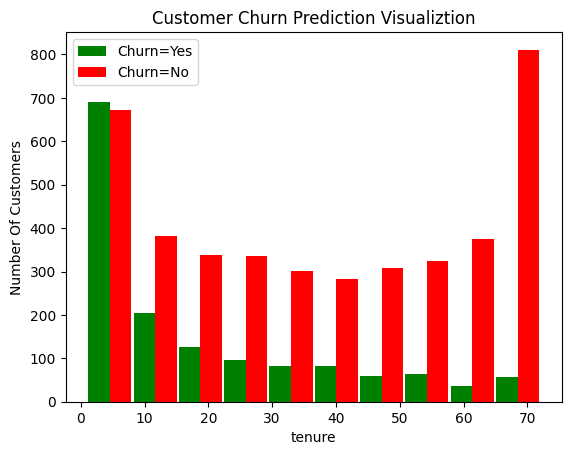

In [15]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

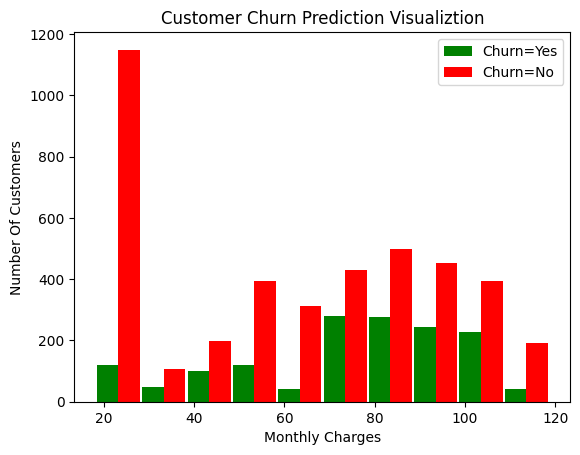

In [18]:
Charges_Month_churn_no = df1[df1.Churn=='No'].Charges_Month
Charges_Month_churn_yes = df1[df1.Churn=='Yes'].Charges_Month

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([Charges_Month_churn_yes, Charges_Month_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [19]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [20]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['No' 'Yes']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['Yes' 'No' 'No internet service']
OnlineBackup: ['No' 'Yes' 'No internet service']
DeviceProtection: ['Yes' 'No' 'No internet service']
TechSupport: ['No' 'No internet service' 'Yes']
TV_Streaming: ['No' 'Yes' 'No internet service']
Movie_Streaming: ['Yes' 'No' 'No internet service']
Contract: ['One year' 'Two year' 'Month-to-month']
PaperlessBilling: ['No' 'Yes']
Method_Payment: ['Mailed check' 'Bank transfer (automatic)' 'Electronic check'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

<ipython-input-21-104b877f3854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-21-104b877f3854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [22]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['No' 'Yes']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['Yes' 'No']
OnlineBackup: ['No' 'Yes']
DeviceProtection: ['Yes' 'No']
TechSupport: ['No' 'Yes']
TV_Streaming: ['No' 'Yes']
Movie_Streaming: ['Yes' 'No']
Contract: ['One year' 'Two year' 'Month-to-month']
PaperlessBilling: ['No' 'Yes']
Method_Payment: ['Mailed check' 'Bank transfer (automatic)' 'Electronic check'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [24]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','TV_Streaming','Movie_Streaming','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

<ipython-input-24-5ad31661234b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [25]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [0 1]
Dependents: [1 0]
tenure: [21 54  1  4  7 32 72 19 10 45 40 47 36 69 71 35  3 68 42  8 46 12 26 49
 33 31 66 58 13 57  6 59 15 27 34 18  5 39 29  2 63 20 14 56 37 24 52 43
 11 16 50 38 23 55 48 53 70 22 28 44 65 64 60 51  9 25 61 30 17 41 67 62]
PhoneService: [1 0]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [1 0]
OnlineBackup: [0 1]
DeviceProtection: [1 0]
TechSupport: [0 1]
TV_Streaming: [0 1]
Movie_Streaming: [1 0]
Contract: ['One year' 'Two year' 'Month-to-month']
PaperlessBilling: [0 1]
Method_Payment: ['Mailed check' 'Bank transfer (automatic)' 'Electronic check'
 'Credit card (automatic)']
Charges_Month: [64.85 97.2  23.45 ... 59.25 35.35 21.15]
TotalCharges: [1336.8  5129.45   23.45 ...  306.05 1200.15  457.3 ]
Churn: [0 1]


In [26]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-26-ba153b6b6960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [27]:
df1.gender.unique()

array([1, 0])

In [28]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','Method_Payment'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'TV_Streaming', 'Movie_Streaming',
       'PaperlessBilling', 'Charges_Month', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Method_Payment_Bank transfer (automatic)',
       'Method_Payment_Credit card (automatic)',
       'Method_Payment_Electronic check', 'Method_Payment_Mailed check'],
      dtype='object')

In [29]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Method_Payment_Bank transfer (automatic),Method_Payment_Credit card (automatic),Method_Payment_Electronic check,Method_Payment_Mailed check
2839,1,0,1,1,35,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3713,1,0,1,0,62,1,0,1,0,1,...,1,0,0,0,0,1,0,0,0,1
3079,0,0,1,1,72,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
767,0,0,0,0,31,1,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4839,0,0,1,1,66,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [30]:
df2.dtypes

gender                                        int64
SeniorCitizen                                 int64
Partner                                       int64
Dependents                                    int64
tenure                                        int64
PhoneService                                  int64
MultipleLines                                 int64
OnlineSecurity                                int64
OnlineBackup                                  int64
DeviceProtection                              int64
TechSupport                                   int64
TV_Streaming                                  int64
Movie_Streaming                               int64
PaperlessBilling                              int64
Charges_Month                               float64
TotalCharges                                float64
Churn                                         int64
InternetService_DSL                           uint8
InternetService_Fiber optic                   uint8
InternetServ

In [31]:
cols_to_scale = ['tenure','Charges_Month','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [32]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [0 1]
Dependents: [1 0]
tenure: [0.28169014 0.74647887 0.         0.04225352 0.08450704 0.43661972
 1.         0.25352113 0.12676056 0.61971831 0.54929577 0.64788732
 0.49295775 0.95774648 0.98591549 0.47887324 0.02816901 0.94366197
 0.57746479 0.09859155 0.63380282 0.15492958 0.35211268 0.67605634
 0.45070423 0.42253521 0.91549296 0.8028169  0.16901408 0.78873239
 0.07042254 0.81690141 0.1971831  0.36619718 0.46478873 0.23943662
 0.05633803 0.53521127 0.3943662  0.01408451 0.87323944 0.26760563
 0.18309859 0.77464789 0.50704225 0.32394366 0.71830986 0.5915493
 0.14084507 0.21126761 0.69014085 0.52112676 0.30985915 0.76056338
 0.66197183 0.73239437 0.97183099 0.29577465 0.38028169 0.6056338
 0.90140845 0.88732394 0.83098592 0.70422535 0.11267606 0.33802817
 0.84507042 0.4084507  0.22535211 0.56338028 0.92957746 0.85915493]
PhoneService: [1 0]
MultipleLines: [0 1]
OnlineSecurity: [1 0]
OnlineBackup: [0 1]
DeviceProtection: [1 0]
TechSupport: [

In [33]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [34]:
X_train.shape

(4499, 26)

In [35]:
X_test.shape

(1125, 26)

In [36]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Method_Payment_Bank transfer (automatic),Method_Payment_Credit card (automatic),Method_Payment_Electronic check,Method_Payment_Mailed check
1707,1,0,0,0,0.521127,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1373,1,0,0,0,0.464789,1,1,1,1,0,...,1,0,0,0,1,0,0,0,0,1
1311,1,0,1,1,0.225352,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
151,1,0,1,1,0.760563,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2456,1,0,1,1,0.267606,1,1,0,0,1,...,0,1,0,1,0,0,1,0,0,0
3998,1,0,0,0,0.760563,1,0,0,1,1,...,1,0,0,0,0,1,0,0,0,1
4968,1,0,0,0,0.126761,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5512,0,0,0,0,0.957746,1,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
3549,0,0,0,1,0.309859,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4739,0,0,0,0,0.492958,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [37]:
len(X_train.columns)

26

In [41]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
141/141 [==============================] - 1s 1ms/step - loss: 0.5677 - accuracy: 0.7062
Epoch 2/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.7875
Epoch 3/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.7908
Epoch 4/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4231 - accuracy: 0.7966
Epoch 5/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8028
Epoch 6/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8006
Epoch 7/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8024
Epoch 8/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8051
Epoch 9/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4135 - accuracy: 0.8080
Epoch 10/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4122 - accura

In [42]:
model.evaluate(X_test, y_test)

36/36 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.7716


[0.4699426591396332, 0.7715555429458618]

In [43]:
yp = model.predict(X_test)
yp[:5]

36/36 [==============================] - 0s 2ms/step


array([[0.22086157],
       [0.8295684 ],
       [0.05329496],
       [0.74301386],
       [0.13931908]], dtype=float32)

In [48]:
y_test[:10]

5128    0
2438    1
1388    0
3415    1
1112    0
3535    0
1805    0
2258    0
1771    0
1309    0
Name: Churn, dtype: int64

In [46]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [49]:
y_pred[:10]

[0, 1, 0, 1, 0, 0, 0, 1, 0, 0]

In [50]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       811
           1       0.62      0.47      0.53       314

    accuracy                           0.77      1125
   macro avg       0.72      0.68      0.69      1125
weighted avg       0.76      0.77      0.76      1125



Text(95.72222222222221, 0.5, 'Truth')

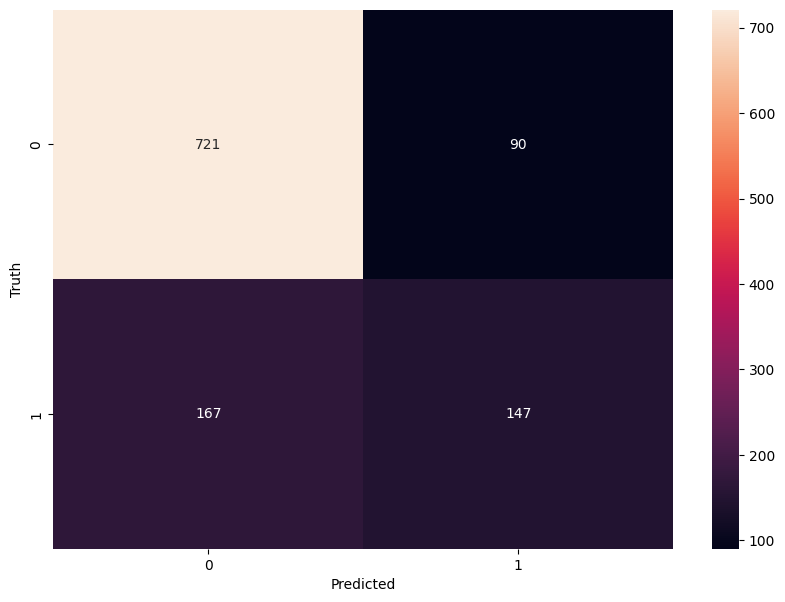

In [51]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')